# Osztályozás

## __Titanic adathalmaz bemutatása és előkészítése__

Az adathalmaz 888 darab személy adatait tartalmazza, akik a Titanic-on tartózkodtak, amikor a katasztrófa bekövetkezett. 

Oszlopok nevei és típusai:
    1. Survived : 0 vagy 1-es értéket vesz fel, az alapján hogy az adott személy túlélte-e a katasztrófát vagy sem --> int64 a típusa
    2. Pclass: 1, 2 vagy 3-as értéket vehet fel, az alapján, hogy az adott személy milyen osztályon utazott --> int64 a típusa
    3. Name: az adott illető nevét tartalmazza --> object a típusa (string)
    4. Sex: male, vagy female-t vesz fel. Személy neme --> object a típusa (string)
    5. Age: személy életkora --> float64 a típusa
    6. Siblings/Spouses Aboard: megmutatja, hogy az adott illetőnek mennyi testvére van a fedélzeten, vagy házastárssal       utazik-e --> int64 a típusa
    7. Parents/Children Aboard: megmutatja, hogy az adott személynek a szülei közül mennyien tartózkodnak a fedélzeten, vagy gyerekei közül mennyivel utazik --> int64 a típusa
    8. Fare: mennyit fizetett a jegyért --> float64 a típusa

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier


from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score


from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
from IPython.display import Image  
import graphviz

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# DataFrame létrehozása Excel fájlból
titanic = pd.read_csv('Titanic.csv')

In [3]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [4]:
# Eldobjuk a NAME oszlopot
titanic.drop(labels='Name', axis=1, inplace=True)

# Dummy váltóvá konvertáljuk a SEX oszlopot (referencia kódolással, ezért csak 1 oszlop lesz belőle)
titanic['Sex'] = pd.get_dummies(titanic['Sex'], drop_first=True)

In [5]:
titanic.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [6]:
# a prediktív válltozók neveinek és az osztálycímke kimentése
classlabel = list(titanic.columns[:1])
features = list(titanic.columns[1:])
print("Osztálycímke:", classlabel, "\n")
print("leíró változók:", features)

Osztálycímke: ['Survived'] 

leíró változók: ['Pclass', 'Sex', 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare']


In [7]:
# DataFrame-et TULAJDONSÁGOK(features, X) és CÉL(target, y) tömbökre bontjuk 
X = titanic.iloc[:, 1:].values
y = titanic.iloc[:, 0].values.reshape(-1,1)

In [8]:
# Tréning és teszt adatok létrehozása 2/3 és 1/3 vágással
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

## __Modellek bemutatásai és implementációi__

### 1. Döntési fa osztályozó

#### Paraméterezés

- criterion: teszt az attribútomok kiválasztásához
    * "gini": Gini-index
    * "entropy": Információ nyereség
- splitter: vágási stratégia
    * "best": legjobb vágás választása
    * "random": legjobb random vágás
- max_depth: a fa maximális mélysége
- min_samples_split: minimális elemszám, ami ahhoz szükséges, hogy egy belső csúcsot tovább bontson az algoritmus
- min_samples_leaf: minimális elemszám ahhoz, hogy egy csomópont lehessen 
- max_leaf_nodes: maximális levélszám

és számos más paraméter...

#### Paraméterek nélküli modell létrehozása

In [9]:
clf_dtree = DecisionTreeClassifier()
print(clf_dtree)

DecisionTreeClassifier()


#### Modell tanítása a tréninghalmazokkal

In [10]:
clf_dtree = clf_dtree.fit(X_train,y_train)

#### Becslés az osztálycímkére vonatkozóan

In [11]:
y_pred_dtree = clf_dtree.predict(X_test)
y_pred_dtree

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0])

#### A modell valós pontossága (accuracy)

In [12]:
print("Paraméterek nélküli pontosság:",accuracy_score(y_test, y_pred_dtree))

Paraméterek nélküli pontosság: 0.8054607508532423


#### Egy felparaméterezett döntési fa

In [13]:
clf_dtree2 = DecisionTreeClassifier(criterion="gini", splitter="best", max_depth=7, min_samples_split=3)
clf_dtree2 = clf_dtree2.fit(X_train,y_train)
y_pred_dtree2 = clf_dtree2.predict(X_test)
print("Paraméteres pontosság:",accuracy_score(y_test, y_pred_dtree2))

Paraméteres pontosság: 0.825938566552901


#### A döntési fa grafikus megjelenítése

In [14]:
dot_data = export_graphviz(clf_dtree2, out_file=None, 
                      feature_names=features,
                      class_names=["Died", "Survived"],
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

**A paraméteres modellhez tartozó keveredési mátrix:**

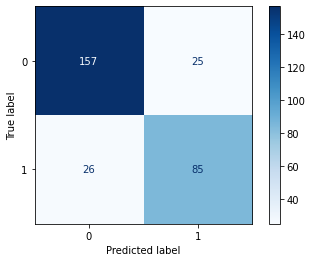

In [15]:
plot_confusion_matrix(clf_dtree2, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

### 2. Naív Gaussian osztályozó

#### Paraméterek:

- priors = prior valószínűségek, ezzel megadhatjuk, hogy milyen előzetes valószínűséget feltételezünk az egyes osztályokra vonatkozóan
- var_smooothing = növeli az algoritmus stabilitását azáltal, hogy a nullával való szorzás helyett, nagyon kicsi számmal szoroz, így nem nulláz le valószínűségeket

#### Attribútumok:

- class_count_: tréning minták száma az eges osztályokban
- class_prior_: az egyes osztályok valószínűsége
- classes_: az osztályozó által talált osztálycímkék
- sigma_: a leíró tulajdonságok osztályonkénti varianciája

stb...

#### Paraméterek nélküli modell létrehozása és modell ilesztése

In [16]:
clf_gnb = GaussianNB()
clf_gnb.fit(X_train, y_train.ravel()) 
# a .ravel "kilapitja" a numpy arrayt egy 1 dimenziós tömbbé (akkor is kell ha alapból 1 dimenziós a tömb)

GaussianNB()

In [17]:
# Osztálycímke "jóslása"
y_pred_gnb = clf_gnb.predict(X_test)
print(y_pred_gnb)

[0 1 0 0 1 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 1 1 0 1 1 0 1 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1 1 1
 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0
 1 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1
 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 0 1 1
 1 0 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0]


In [18]:
# Modell kiértékelése
print("A modell pontossága:", clf_gnb.score(X_test,y_test))

A modell pontossága: 0.7918088737201365


**A modellhez tartozó keveredési mátrix:**

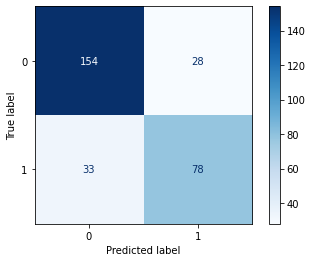

In [19]:
plot_confusion_matrix(clf_gnb, X_test, y_test, cmap=plt.cm.Blues)
plt.show()


Írassuk ki a naív Bayes osztályozó néhány jellemző tulajdonságát!

In [20]:
print("Mintaegyedek az osztályokban:", clf_gnb.class_count_)
print("Az osztályok valószínűsége:", clf_gnb.class_prior_)
print("Osztáylcímkék:", clf_gnb.classes_)
print("Leíró tulajdonságok variancája az egyes osztályokban:", clf_gnb.sigma_)

Mintaegyedek az osztályokban: [363. 231.]
Az osztályok valószínűsége: [0.61111111 0.38888889]
Osztáylcímkék: [0 1]
Leíró tulajdonságok variancája az egyes osztályokban: [[5.41328450e-01 1.24690242e-01 1.89692331e+02 1.55396420e+00
  6.42763537e-01 1.12142365e+03]
 [7.64718145e-01 2.19263600e-01 2.12893683e+02 4.65398417e-01
  6.30725154e-01 3.89567886e+03]]


Nézzük meg, hogy változik-e az osztályozás pontossága, ha megadunk prior valószínűségeket az osztályokba való tartózásra vonatkozóan!

In [21]:
model_gnb1 = GaussianNB(priors=[0.20, 0.80]) 
model_gnb1 = model_gnb1.fit(X_train, y_train.ravel())
print("A modell pontossága prior valószínűségek megadásával:", model_gnb1.score(X_test,y_test))

A modell pontossága prior valószínűségek megadásával: 0.7747440273037542


### 3. k-legközelebbi szomszéd esetalapú osztályozó

#### Paraméterek:

- n_neighbors: a szomszédok száma
- weights: súlyozás
    * 'uniform': nincs súlyozás
    * 'distance': a távolság inversével arányos súlyozás
    * [callable]: felhasználó által megadható súlyfüggvény
- metric: az alkalmazandó távolságmetrika
    * alapértelmezett értéke "minkowski"
- p: a minkowski távolság p értéke (p=1 -> manhattan; p=2 euklideszi)

**A modell létrehozása és illesztése**

In [22]:
clf_knn = KNeighborsClassifier(n_neighbors=3)
clf_knn.fit(X_train, y_train.ravel())

KNeighborsClassifier(n_neighbors=3)

In [23]:
# Osztálycímke "jóslása"
y_pred_knn = clf_knn.predict(X_test)
print(y_pred_knn)

[1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 0
 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 1
 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 0 1 1 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0
 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 1 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1
 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0]


In [24]:
# Modell kiértékelése
print("A modell pontossága:", clf_knn.score(X_test,y_test))

A modell pontossága: 0.6928327645051194


**A modellhez tartozó keveredési mátrix:**

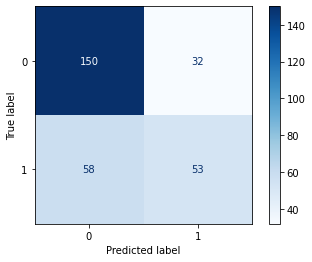

In [25]:
plot_confusion_matrix(clf_knn, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

### 4. Support Vector osztályozó

Az SVC osztályozónak számos paraméterezési lehetősége van, érdemes a dokumentációban részletesen elolvasni.

**A modell létrehozása és illesztése**

In [26]:
clf_svm = SVC()
clf_svm.fit(X_train, y_train.ravel())

SVC()

In [27]:
# Osztálycímke "jóslása"
y_pred_svm = clf_svm.predict(X_test)
print(y_pred_svm)

[0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 1 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [28]:
# Modell kiértékelése
print("A modell pontossága:", clf_svm.score(X_test,y_test))

A modell pontossága: 0.658703071672355


**A modellhez tartozó keveredési mátrix:**

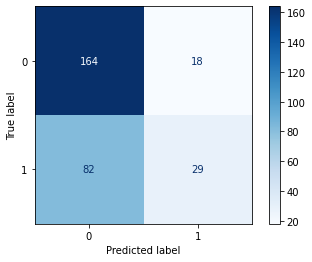

In [29]:
plot_confusion_matrix(clf_svm, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

### 5. Random Forest osztályozó

**Fontopsabb paraméterek:**

- n_estimators: az erdő mérete (deafult értéke 100)
- max_depth: fák maximális mélysége
- creterion: hogyan válassza ki az attribútumokat
    * 'gini': Gini index
    * 'entropy': információnyereség elve
- min_samples_leaf: a csúcs szétbontásához minimálisan szükséges mintaszám

**Random Forest osztályozó létrehozása és a modell illesztése default paraméterekkel**

In [30]:
clf_rfc = RandomForestClassifier()
clf_rfc = clf_rfc.fit(X_train, y_train.ravel())

In [31]:
# Osztálycímke "jóslása"
y_pred_rfc = clf_rfc.predict(X_test)
print(y_pred_rfc)

[0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1
 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0
 1 1 0 1 1 1 0 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 1 0 1 0 1 1 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1
 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 0 1 1
 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0]


In [32]:
# Modell kiértékelése
print("A modell pontossága:", clf_rfc.score(X_test,y_test))

A modell pontossága: 0.8361774744027304


**A modellhez tartozó keveredési mátrix:**

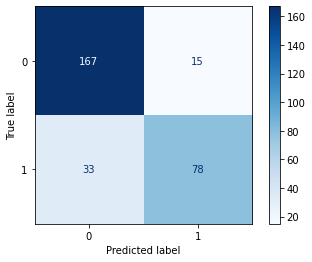

In [33]:
plot_confusion_matrix(clf_rfc, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

#### Az algoritmus különboző paramétereinek tesztelése

##### Az erdő mérete : n_estimators

In [34]:
clf_rfc2 = RandomForestClassifier(random_state=0, n_estimators=30)
clf_rfc2 = clf_rfc2.fit(X_train, y_train.ravel())
clf_rfc2.score(X_test,y_test)

0.8191126279863481

##### Fa maximális mélysége : max_depth

In [35]:
# alapból nincs korlátja 
clf_rfc5 = RandomForestClassifier(random_state=0, max_depth=4)
clf_rfc5 = clf_rfc5.fit(X_train, y_train.ravel())
clf_rfc5.score(X_test,y_test)

0.8464163822525598

##### Teszt attribútumok kiválasztása : criterion 

In [36]:
# alapból "gini"(Gini index) de lehet "entropy" (információnyereség elve) is 
clf_rfc6 = RandomForestClassifier(random_state=0,criterion="entropy")
clf_rfc6 = clf_rfc6.fit(X_train, y_train.ravel())
clf_rfc6.score(X_test,y_test)

0.8293515358361775

In [37]:
# alapból "gini"(Gini index) de lehet "entropy" (információnyereség elve) is 
clf_rfc7 = RandomForestClassifier(random_state=0,criterion="gini")
clf_rfc7 = clf_rfc7.fit(X_train, y_train.ravel())
clf_rfc7.score(X_test,y_test)

0.825938566552901

##### A csúcs szétbontásához minimálisan szükséges mintaszám : min_samples_leaf

In [38]:
# alapból 1
# ha ennél az értéknél kevesebb marad egy csomó ponton akkor azt már nem probálja tovább osztani
clf_rfc8 = RandomForestClassifier(random_state=0,min_samples_leaf=15)
clf_rfc8 = clf_rfc8.fit(X_train, y_train.ravel())
clf_rfc8.score(X_test,y_test)

0.8225255972696246

#### Komlex paraméterekkel egy jónak tűnő megoldás

0.8430034129692833


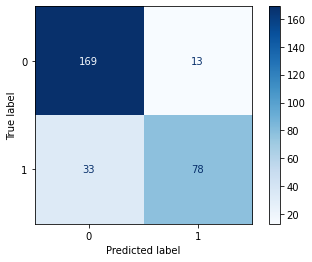

In [39]:
clf_rfc9 = RandomForestClassifier(n_estimators=40, random_state=0, criterion="entropy",  max_depth=5)
clf_rfc9 = clf_rfc9.fit(X_train, y_train.ravel())
print(clf_rfc9.score(X_test,y_test))

plot_confusion_matrix(clf_rfc9, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

### 6. MLPClassifier (forrás és köszönet: Tóth Péter Csabának)

MLPClassifier a neurális hálók családjába tartozik, amely egy több rétegű perceptron algoritmust implementál. Tanítása Backpropagation-nel történik.

Mit is jelent a Perceptron (leegyszerűsítve): bináris osztályozó algoritmus. Egy rétegből álló neurális hálónak is szokás nevezni.

Mit jelent a Backpropagation: ez az algoritmus próbálja úgy igazítani a súlyokat, hogy a legoptimálisabbakat találja meg. Először is megpróbálja kitalálni a hiba függvényt. Ezután minden egyes
    súlyra megnézi, hogy a hiba függvény értékének állításával, hogyan befolyásolja a súlyokat, azaz merre mozognak, pozitív vagy negatív irányba. Végül, hogy már tudja, hogy hogyan befolyásolja
    a hiba függvény állítgatása a súlyokat... így minden egyes súlynál, úgy állítja a súlyokat, hogy a hiba függvény értéke a lehető legkisebb legyen.
    
MLPClassifier használatának:
    1. előnyei:
        - képes nem lineáris modellek megtanulására
        - képes valós idejű tanulásra a partial_fit metódus segítségével
    2. hátrányai:
        - nagyon érzékeny a feature scalingre
        - hyperparameter tuning nagyon sok időt tud elvenni
        - csak egyetlen egy aktivációs függvényt lehet használni az összes hidden_layeren keresztül

#### Alapértelmezett paraméterekkel futassuk le az MLPClassifiert a Titanic adathalmazunkon

In [40]:
# Példányosítsuk a modellünket, majd illeszük az edző halmazunkra
clf_nn = MLPClassifier(random_state=0)
clf_nn.fit(X_train, y_train.ravel())

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=0)

Sajnos mint látjuk, az alapbeállításokkal a modell nem konvergál megfelelő mértékben :(.

In [41]:
# Jósoltassuk meg az eredményeket az edzett modellünkkel
y_pred_nn = clf_nn.predict(X_test)
print(y_pred_nn)

[0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 0
 1 1 0 1 1 1 0 1 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0
 1 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 1 0 0 1
 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1 0 1 0 0 1 1 1 0 1 0 1 0 0 1 1
 1 0 0 0 1 1 0 0 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0]


In [42]:
# Végül írassuk ki, a modell eredményét
print(classification_report(y_true=y_test, y_pred=y_pred_nn))

print('F1 score: ', f1_score(y_true=y_test, y_pred=y_pred_nn))

print('Accuracy score: ', str(clf_nn.score(X_test,y_test)))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       182
           1       0.75      0.68      0.72       111

    accuracy                           0.80       293
   macro avg       0.79      0.77      0.78       293
weighted avg       0.79      0.80      0.79       293

F1 score:  0.7169811320754719
Accuracy score:  0.7952218430034129


In [43]:
# Modellünk AUC értéke
print('AUC:', roc_auc_score(y_true=y_test, y_score=y_pred_nn))

AUC: 0.7736610236610237


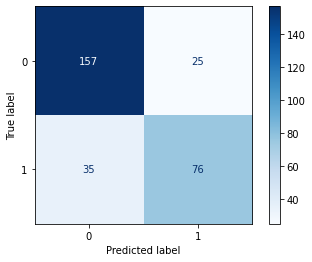

In [44]:
# Készítsük el a confusion_matrix-unkat
plot_confusion_matrix(clf_nn, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

In [45]:
# Eltároljuk az eredményét egy dictionary-be hogy később össze tudjuk hasonlítani őket
results = [{'name': 'without parameter tuning(1)','accuracy_score': clf_nn.score(X_test,y_test) ,'f1-score': f1_score(y_true=y_test, y_pred=y_pred_nn), 'roc_auc_score': roc_auc_score(y_true=y_test, y_score=y_pred_nn), 'solver': 'adam', 'activation': 'relu'}]
print (results)

[{'name': 'without parameter tuning(1)', 'accuracy_score': 0.7952218430034129, 'f1-score': 0.7169811320754719, 'roc_auc_score': 0.7736610236610237, 'solver': 'adam', 'activation': 'relu'}]


### Elsőre, semmilyen paraméter állítgatással, viszonylag jó eredményt értünk el... Most nézzük meg a legfőbb paramétereinket

- hidden_layer_size=(csomópontok száma, hidden layerek száma) : számos elmélet létezik, hogy hogyan is érdemes megválasztani az ideális mennyiségű rétegszámot, illetve a rétegenkénti csomópontok számát...
    Többnyire elég egy hidden layert beiktatnunk. Általánosságban a következő érvényes a csomópontok számának meghatározásakkor: meg kell néznünk, hogy mennyi csomópontunk van a bemeneti  rétegben (mennyi feature oszlopunk van),
    utána mennyi van a kimeneti rétegben( ha az NN bináris classifier, akkor elég 1 csomópont), és e két érték közötti intervallumból kell választanunk ( szokás az input és output layerek átlagát venni is).
    
    A mi esetünkben ---> 
        - bemeneti csomópontok : 6 darab feature oszlopunk van
        - kimeneti csomópontok : 1 darab, mert osztályozunk
    Emiatt 1 < hidden layer csomópontok száma < 6. ---> Vegyük 1 és 6 átlagát ---> 3.5 ~ 4    
    
    Tehát hidden_layer_size(4,)
    
    Fontos megjegyezni, hogy a Deep Learning világában csak teóriák léteznek a korábban említett paraméter pontos megállapításához.
    

- activation=...  : aktivációs függvények a hidden layer(ek) számára. ( különböző matematikai függvények )
    - relu : ez a leghasználtabb aktivációs függvény, visszaadja f(x) = max(0, x)
    - tanh : hiperbólikus tangens függvény, visszaadja f(x) = tanh(x)
    - logistic : logisztikus sigmoid függvény, visszaadja f(x) = 1 / (1 + exp(-x))
    - identity : visszaadja f(x) = x

- solver=... : súly optimalizáláshoz használt 'megoldók'
    - adam : stochastic gradient alapú optimalizáló
    - sgd : stochastic gradient descent
    - lbfgs : quasi-Newton methods családba tartozó optimalizáló
    
    Fontos megjegyezni, hogy az ADAM optimalizáló nagyon jól működik nagy méretű adathalmazokon (több ezer rekord..), ezzel szemben az LBFGS optimalizáló rendkívűl gyorsan konvergál a jó megoldás felé és nagyon jól teljesít kisebb adathalmazokon.
    
    Számunkra kevesebb, mint 1000 rekord áll rendelkezésre, ezért nagy valószínűséggel az LBFGS optimalizáló lesz az ideális.

- max_iter=... : maximum iterációk száma
    - optimalizáló, addig iterál, míg nem egyenlő ezzel az értékkel
    - stochasztikus optimalizálóknál (sgd, adam) ez az epoch számát jelenti, azaz hányszor lesz felhasználva egy-egy rekord (hányszor menjen végig az adathalmazon)

- alpha=... : L2 regularizációs paraméter. A súlyok nullától való eltérésértékének négyzetével „büntet” (a költségfüggvényben jelenik meg). 
    - Alapértelmezett érték: 0.0001

### Most, hogy már tisztában vagyunk a legfontosabb paraméterekkel, játszadozzunk picit velük, majd hasonlítsuk össze az így kapott eredményeket

In [68]:
print(X_train)

[[  1.      0.     22.      0.      0.    151.55 ]
 [  1.      0.     30.      0.      0.     31.   ]
 [  1.      1.     47.      0.      0.     38.5  ]
 ...
 [  1.      1.     31.      1.      0.     52.   ]
 [  3.      1.      9.      1.      1.     15.9  ]
 [  3.      1.     45.5     0.      0.      7.225]]


In [ ]:
# 1. LBFGS
classifier_1 = MLPClassifier( 
                    hidden_layer_sizes=(4,), 
                    activation='relu',
                    solver='lbfgs',
                    max_iter=1000,
                    alpha=0.001,
                    random_state=0)

classifier_1.fit(X_train, y_train.ravel())
y_pred_clf_1 = classifier_1.predict(X_test)

plot_confusion_matrix(classifier_1, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

In [67]:
print('roc auc score: '+ str(roc_auc_score(y_true=y_test, y_score=y_pred_clf_1)))
print('f1 score: '+  str(f1_score(y_true=y_test, y_pred=y_pred_clf_1)))
print('Accuracy score: '+  str(classifier_1.score(X_test,y_test)))
print(classification_report(y_true=y_test, y_pred=y_pred_clf_1))

results.append({'name': 'LBFGS+RELU(2)','accuracy_score': classifier_1.score(X_test,y_test),'f1-score': f1_score(y_true=y_test, y_pred=y_pred_clf_1), 'roc_auc_score': roc_auc_score(y_true=y_test, y_score=y_pred_clf_1), 'solver': 'lbfgs', 'activation': 'relu'})

roc auc score: 0.7964062964062963
f1 score: 0.7464114832535885
Accuracy score: 0.8191126279863481
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       182
           1       0.80      0.70      0.75       111

    accuracy                           0.82       293
   macro avg       0.81      0.80      0.80       293
weighted avg       0.82      0.82      0.82       293



/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


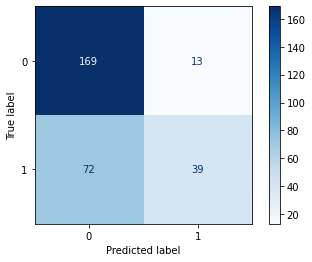

In [48]:
# 2. ADAM
classifier_2 = MLPClassifier( 
                    hidden_layer_sizes=(4,), 
                    activation='relu',
                    solver='adam',
                    max_iter=200,
                    alpha=0.05,
                    random_state=0)

classifier_2.fit(X_train, y_train.ravel())
y_pred_clf_2 = classifier_2.predict(X_test)

plot_confusion_matrix(classifier_2, X_test,  y_test, cmap=plt.cm.Blues)
plt.show()

In [49]:
print('roc auc score: '+ str(roc_auc_score(y_true=y_test, y_score=y_pred_clf_2)))
print('f1 score: '+ str(f1_score(y_true=y_test, y_pred=y_pred_clf_2)))
print('Accuracy score: '+ str(classifier_2.score(X_test,y_test)))
print(classification_report(y_true=y_test, y_pred=y_pred_clf_2))

results.append({'name': 'ADAM+RELU(3)', 'accuracy_score': classifier_2.score(X_test,y_test),'f1-score': f1_score(y_true=y_test, y_pred=y_pred_clf_2), 'roc_auc_score': roc_auc_score(y_true=y_test, y_score=y_pred_clf_2), 'solver': 'adam', 'activation': 'relu'})

roc auc score: 0.63996138996139
f1 score: 0.47852760736196326
Accuracy score: 0.7098976109215017
              precision    recall  f1-score   support

           0       0.70      0.93      0.80       182
           1       0.75      0.35      0.48       111

    accuracy                           0.71       293
   macro avg       0.73      0.64      0.64       293
weighted avg       0.72      0.71      0.68       293



#### Nagyon rossz eredményt kaptunk ADAM solver-rel, ezért nem is fogunk vele foglalkozni innentől

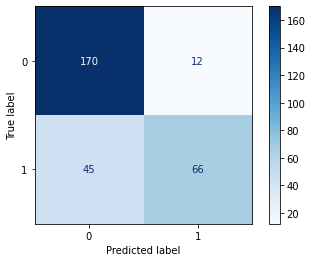

In [50]:
# 3. LBFGS
classifier_3 = MLPClassifier( 
                    hidden_layer_sizes=(4,), 
                    activation='logistic',
                    solver='lbfgs',
                    max_iter=1000,
                    alpha=0.005,
                    random_state=0)

classifier_3.fit(X_train, y_train.ravel())
y_pred_clf_3 = classifier_3.predict(X_test)

plot_confusion_matrix(classifier_3, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

In [51]:
print('roc auc score: '+str(roc_auc_score(y_true=y_test, y_score=y_pred_clf_3)))
print('f1 score: '+ str(f1_score(y_true=y_test, y_pred=y_pred_clf_3)))
print('Accuracy score: '+ str(classifier_3.score(X_test,y_test)))
print(classification_report(y_true=y_test, y_pred=y_pred_clf_3))

results.append({'name': 'LBFGS+LOGISTIC(4)', 'accuracy_score': classifier_3.score(X_test,y_test) ,'f1-score': f1_score(y_true=y_test, y_pred=y_pred_clf_3), 'roc_auc_score': roc_auc_score(y_true=y_test, y_score=y_pred_clf_3), 'solver': 'lbfgs', 'activation': 'logistic'})

roc auc score: 0.7643302643302644
f1 score: 0.6984126984126985
Accuracy score: 0.8054607508532423
              precision    recall  f1-score   support

           0       0.79      0.93      0.86       182
           1       0.85      0.59      0.70       111

    accuracy                           0.81       293
   macro avg       0.82      0.76      0.78       293
weighted avg       0.81      0.81      0.80       293



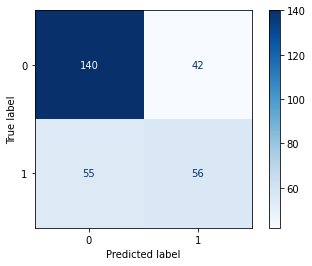

In [52]:
# 4. LBFGS
classifier_4 = MLPClassifier( 
                    hidden_layer_sizes=(4,), 
                    activation='tanh',
                    solver='lbfgs',
                    max_iter=800,
                    alpha=0.005,
                    random_state=0)

classifier_4.fit(X_train, y_train.ravel())
y_pred_clf_4 = classifier_4.predict(X_test)

plot_confusion_matrix(classifier_4, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

In [53]:
print('roc auc score: '+str(roc_auc_score(y_true=y_test, y_score=y_pred_clf_4)))
print('f1 score: '+ str(f1_score(y_true=y_test, y_pred=y_pred_clf_4)))
print('Accuracy score: '+ str(classifier_4.score(X_test,y_test)))
print(classification_report(y_true=y_test, y_pred=y_pred_clf_4))

results.append({'name': 'LBFGS+TANH(5)', 'accuracy_score': classifier_4.score(X_test,y_test),'f1-score': f1_score(y_true=y_test, y_pred=y_pred_clf_4), 'roc_auc_score': roc_auc_score(y_true=y_test, y_score=y_pred_clf_4), 'solver': 'lbfgs', 'activation': 'tanh'})

roc auc score: 0.6368676368676368
f1 score: 0.5358851674641147
Accuracy score: 0.6689419795221843
              precision    recall  f1-score   support

           0       0.72      0.77      0.74       182
           1       0.57      0.50      0.54       111

    accuracy                           0.67       293
   macro avg       0.64      0.64      0.64       293
weighted avg       0.66      0.67      0.66       293



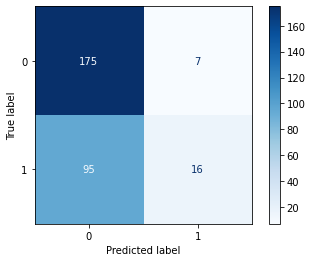

In [54]:
# 4. SGD
classifier_5 = MLPClassifier( 
                    hidden_layer_sizes=(4,), 
                    activation='tanh',
                    solver='sgd',
                    max_iter=1000,
                    alpha=0.005,
                    learning_rate='adaptive',
                    random_state=0)

classifier_5.fit(X_train, y_train.ravel())
y_pred_clf_5 = classifier_5.predict(X_test)

plot_confusion_matrix(classifier_5, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

In [55]:
print('roc auc score: '+str(roc_auc_score(y_true=y_test, y_score=y_pred_clf_5)))
print('f1 score: '+ str(f1_score(y_true=y_test, y_pred=y_pred_clf_5)))
print('Accuracy score: '+ str(classifier_5.score(X_test,y_test)))
print(classification_report(y_true=y_test, y_pred=y_pred_clf_5))

results.append({'name': 'SGD+TANH(6)', 'accuracy_score': classifier_5.score(X_test,y_test) ,'f1-score': f1_score(y_true=y_test, y_pred=y_pred_clf_5), 'roc_auc_score': roc_auc_score(y_true=y_test, y_score=y_pred_clf_5), 'solver': 'sgd', 'activation': 'tanh'})

roc auc score: 0.5528413028413028
f1 score: 0.23880597014925373
Accuracy score: 0.6518771331058021
              precision    recall  f1-score   support

           0       0.65      0.96      0.77       182
           1       0.70      0.14      0.24       111

    accuracy                           0.65       293
   macro avg       0.67      0.55      0.51       293
weighted avg       0.67      0.65      0.57       293



In [56]:
# A kapott eredményeket DataFrame-mé alakítjuk
model_results = pd.DataFrame(results)
print(model_results)

                          name  accuracy_score  f1-score  roc_auc_score  \
0  without parameter tuning(1)        0.795222  0.716981       0.773661   
1                LBFGS+RELU(2)        0.819113  0.746411       0.796406   
2                 ADAM+RELU(3)        0.709898  0.478528       0.639961   
3            LBFGS+LOGISTIC(4)        0.805461  0.698413       0.764330   
4                LBFGS+TANH(5)        0.668942  0.535885       0.636868   
5                  SGD+TANH(6)        0.651877  0.238806       0.552841   

  solver activation  
0   adam       relu  
1  lbfgs       relu  
2   adam       relu  
3  lbfgs   logistic  
4  lbfgs       tanh  
5    sgd       tanh  


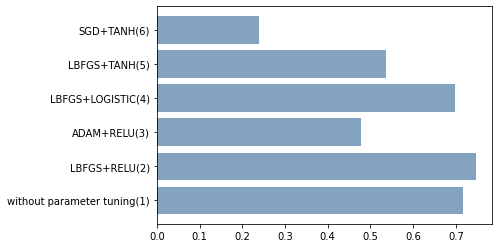

In [57]:
# F1_SCORE-t hasonlítjuk össze
y_pos = np.arange(len(model_results['name']))

plt.barh(y_pos, model_results['f1-score'], color=(0.2, 0.4, 0.6, 0.6))
plt.yticks(y_pos, model_results['name'])
plt.show()

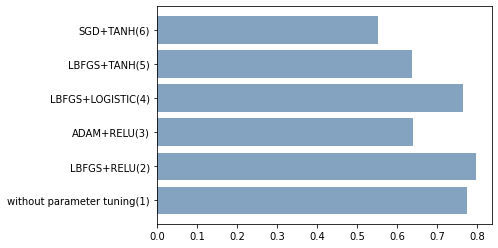

In [58]:
# ROC_AUC_SCORE-t hasonlítjuk össze
y_pos = np.arange(len(model_results['name']))

plt.barh(y_pos, model_results['roc_auc_score'], color=(0.2, 0.4, 0.6, 0.6))
plt.yticks(y_pos, model_results['name'])
plt.show()

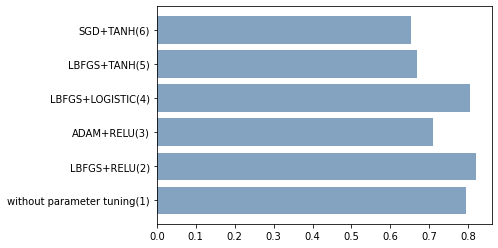

In [59]:
# ACCURACY_SCORE-t hasonlítjuk össze
y_pos = np.arange(len(model_results['name']))

plt.barh(y_pos, model_results['accuracy_score'], color=(0.2, 0.4, 0.6, 0.6))
plt.yticks(y_pos, model_results['name'])
plt.show()

In [60]:
print('Legjobb accuracy_score: \n'+str(model_results[['name','accuracy_score']].loc[model_results['accuracy_score'].idxmax()]))

Legjobb accuracy_score: 
name              LBFGS+RELU(2)
accuracy_score         0.819113
Name: 1, dtype: object


In [61]:
print('Legjobb roc_auc_score: \n'+str(model_results[['name','roc_auc_score']].loc[model_results['roc_auc_score'].idxmax()]))

Legjobb roc_auc_score: 
name             LBFGS+RELU(2)
roc_auc_score         0.796406
Name: 1, dtype: object


In [62]:
print('Legjobb f1_score: \n'+str(model_results[['name','f1-score']].loc[model_results['f1-score'].idxmax()]))

Legjobb f1_score: 
name        LBFGS+RELU(2)
f1-score         0.746411
Name: 1, dtype: object


#### Kézi hangolással nem sokkal tudtuk javítani a modellünket. De szerencsére van ennél egy jobb megoldás:a hyperparaméter optimalizálás!

In [63]:
# RandomizedSeachCV -vel paraméter finomhangolás AUC érték alapján

from sklearn.model_selection import RandomizedSearchCV

randomized_clf = MLPClassifier(hidden_layer_sizes=(4))
params = {
    'activation': ['tanh', 'relu', 'logistic'],
    'hidden_layer_sizes' :[(2,), (3,), (4,), (5,)],
    'solver': ['lbfgs', 'sgd'],
    'max_iter': [50, 100, 500, 1000, 2000],
    'alpha': [0.0001, 0.001, 0.01],
    'random_state': [0]
}

randomsearch = RandomizedSearchCV(
    estimator = randomized_clf,
    param_distributions = params,
    n_iter = 10,
    scoring = 'roc_auc',
    n_jobs = -1,
    random_state = 0,
    verbose = 0
)

randomsearch.fit(X_train, y_train.ravel())
print(randomsearch.best_params_)
print(randomsearch.best_score_)


{'solver': 'lbfgs', 'random_state': 0, 'max_iter': 1000, 'hidden_layer_sizes': (3,), 'alpha': 0.01, 'activation': 'relu'}
0.8376400276253596


In [64]:
# RandomizedSeachCV -vel paraméter finomhangolás Accuracy érték alapján

from sklearn.model_selection import RandomizedSearchCV

randomized_clf = MLPClassifier(hidden_layer_sizes=(4))
params = {
    'activation': ['tanh', 'relu', 'logistic'],
    'hidden_layer_sizes' :[(2,), (3,), (4,), (5,)],
    'solver': ['lbfgs', 'sgd'],
    'max_iter': [50, 100, 500, 1000, 2000],
    'alpha': [0.0001, 0.001, 0.01],
    'random_state': [0]
}

randomsearch = RandomizedSearchCV(
    estimator = randomized_clf,
    param_distributions = params,
    n_iter = 10,
    scoring = 'accuracy',
    n_jobs = -1,
    random_state = 0,
    verbose = 0
)

randomsearch.fit(X_train, y_train.ravel())
print(randomsearch.best_params_)
print(randomsearch.best_score_)


{'solver': 'lbfgs', 'random_state': 0, 'max_iter': 100, 'hidden_layer_sizes': (5,), 'alpha': 0.01, 'activation': 'relu'}
0.7878507335137446


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [65]:
# RandomizedSeachCV -vel paraméter finomhangolás AUC érték alapján

from sklearn.model_selection import RandomizedSearchCV

randomized_clf = MLPClassifier(hidden_layer_sizes=(4))
params = {
    'activation': ['tanh', 'relu', 'logistic'],
    'hidden_layer_sizes' :[(2,), (3,), (4,), (5,)],
    'solver': ['lbfgs', 'sgd'],
    'max_iter': [50, 100, 500, 1000, 2000],
    'alpha': [0.0001, 0.001, 0.01],
    'random_state': [0]
}

randomsearch = RandomizedSearchCV(
    estimator = randomized_clf,
    param_distributions = params,
    n_iter = 10,
    scoring = 'f1',
    n_jobs = -1,
    random_state = 0,
    verbose = 0
)

randomsearch.fit(X_train, y_train.ravel())
print(randomsearch.best_params_)
print(randomsearch.best_score_)


{'solver': 'lbfgs', 'random_state': 0, 'max_iter': 100, 'hidden_layer_sizes': (5,), 'alpha': 0.01, 'activation': 'relu'}
0.7239738547116253


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


#### Fontos megjegyezni, ha még több rekord, illetve tulajdonság oszlop állt volna rendelkezésre, akkor valószínűleg még jobb eredményt tudtunk volna kihozni az MLPClassifier algoritmusból. 